# 2PCF in projected space, $\xi(R_{\parallel}, R_{\perp})$

Here we present the two-dimensional correlation of the mock buzzard results

In [43]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [44]:
# !pip install nbodykit

In [45]:
from nbodykit.lab import *
from nbodykit import setup_logging, style

from scipy.interpolate import InterpolatedUnivariateSpline
import matplotlib.pyplot as plt
plt.style.use(style.notebook)

In [46]:
#!/usr/bin/env python
import os, fitsio

import sys
import numpy as np
import matplotlib.pyplot as plt
from astropy.io.fits import getdata
from astropy.table import Table
from scipy.interpolate import interp1d

In [47]:
import matplotlib
matplotlib.rc('xtick', labelsize=20, top=True, direction='in')
matplotlib.rc('ytick', labelsize=20, right=True, direction='in')
matplotlib.rc('axes', linewidth=1, labelsize=20)
matplotlib.rc('xtick.major', size=5)
#matplotlib.rc('xtick.minor', size=5)
matplotlib.rc('ytick.major', size=5)
#matplotlib.rc('ytick.minor', size=5)

In [48]:
zbins = np.array([0.2, 0.32, 0.373, 0.51, 0.65])
zmin_list = np.array([0.2, 0.373, 0.51])
zmax_list = np.array([0.32, 0.51, 0.64])
zmeans = np.array([0.25, 0.44, 0.575])

In [49]:
from bokeh.palettes import Magma, Inferno, Plasma, Viridis, Cividis

colors = Plasma[5]

In [50]:
zlabel = [r'$ %.2f < z < %.2f$'%(zmin,zmax) for zmin, zmax in zip(zmin_list, zmax_list)]

In [51]:
kwargs = {'r':r'$s \; [Mpc]$',
          'sxi': r'$ s^2 \xi(s)$',
          'xi': r'$  \xi$',
          'k': r"$k$ [$h \ \mathrm{Mpc}^{-1}$]",
          'pk': r"$k \times P_\ell$ [$h^{-3} \mathrm{Mpc}^3$]",
          'rperp': r'$r_{\perp} \; [Mpc/h^2]$',
          'pi': r'$r_{\parallel} \; [Mpc/h]$'
         }

# Correlation Function $\xi_{hh}(r)$

## Running Instructions

MPI is needed to run the function `SurveyData2PCF` from  `nbodykit`. The code don't work on jupyter environments only trough scripts. To activate the script is 
need to activate the MPI on nersc accordingly. Following the instructions the code documentation
```
salloc --nodes 6 --qos interactive --time 01:00:00 --constraint haswell --account=des
source /global/common/software/m3035/conda-activate.sh 3.7
```

After setting up, you can run using `srun`

```
srun -n 180 python run.py 1
```

For more instructions take a look at: https://nbodykit.readthedocs.io/en/latest/results/parallel.html

### Load Results

In [52]:
fname = '/global/cfs/cdirs/des/jesteves/data/buzzard/v1.9.8/y3_rm/nbody_output/xi_z%i_all.json'
crfs = []
for i in range(3):
    crfs.append(SurveyData2PCF.load(fname%i))


In [53]:
crfs[0].attrs

{'mode': 'projected',
 'edges': array([  3.        ,   3.13000171,   3.26563691,   3.40714971,
          3.55479481,   3.70883795,   3.86955638,   4.03723936,
          4.21218871,   4.39471929,   4.58515964,   4.78385251,
          4.99115552,   5.20744177,   5.43310056,   5.66853802,
          5.91417791,   6.17046233,   6.43785255,   6.71682984,
          7.00789631,   7.31157582,   7.62841494,   7.95898395,
          8.3038778 ,   8.66371725,   9.03914995,   9.43085161,
          9.83952723,  10.26591236,  10.71077443,  11.17491411,
         11.65916677,  12.16440399,  12.69153511,  13.24150888,
         13.81531517,  14.41398672,  15.03860104,  15.69028234,
         16.37020354,  17.07958838,  17.81971363,  18.5919114 ,
         19.39757152,  20.23814403,  21.11514184,  22.03014338,
         22.98479551,  23.98081644,  25.01999886,  26.1042131 ,
         27.23541058,  28.41562726,  29.64698734,  30.93170706,
         32.27209871,  33.67057475,  35.12965223,  36.65195722,
         

In [54]:
crfs[0].corr['corr'].shape

(99, 200)

## Plot 2D

In [55]:
self = crfs[2]

In [150]:
from scipy.ndimage.filters import gaussian_filter
from scipy.interpolate import interp2d

r2d = self.corr['rp']
# rperp = self.corr['rp'][:,0]

h= 0.7
h2 = h**2
pivec = np.arange(0., 200, 1)*h
rpar = h2*(self.attrs['edges'][:-1]+np.diff(self.attrs['edges'])/2.)
e1, e2 = np.meshgrid(rpar, pivec)

z = self.corr['corr'].T
# z = np.where(z<0, 0., z)
z = gaussian_filter(z, 2)

# e1 /= 0.7
nx, ny = e1.shape
i0, i1 = np.argmin(np.abs(pivec-30)), np.argmin(np.abs(rpar-30))
# print(i0)

/tmp/ipykernel_610/3865157678.py:1: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter


/tmp/ipykernel_610/3656714267.py:6: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  im = ax.pcolormesh(e1[:i0,:i1], e2[:i0,:i1], z[:i0,:i1], norm=LogNorm(vmin, vmax), cmap=cmap)


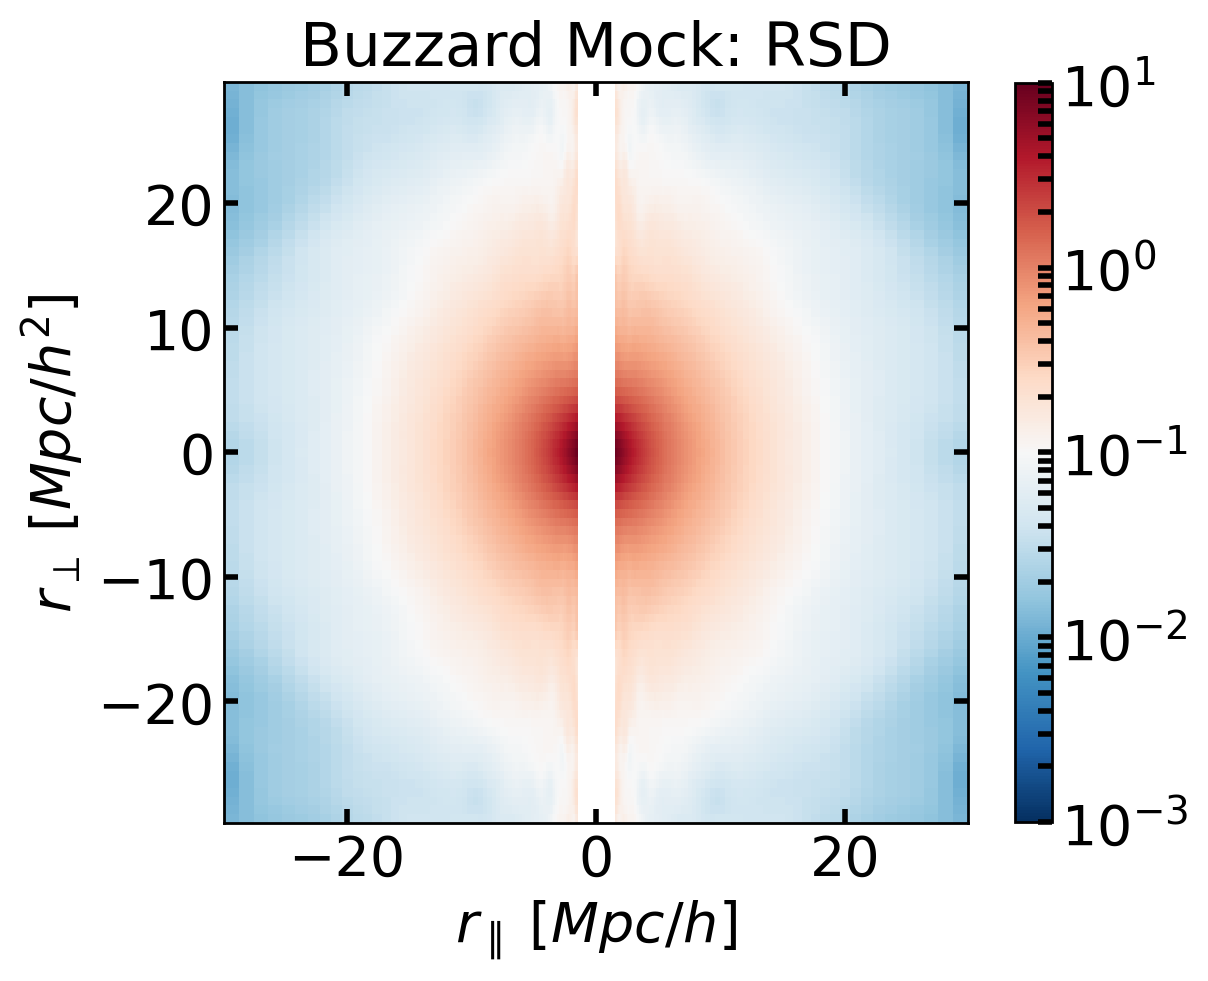

In [151]:
from matplotlib.colors import LogNorm
cmap = 'RdBu_r'
vmin, vmax = 0.001, 10.

fig, ax = plt.subplots(1, 1, figsize=(6, 6.))
im = ax.pcolormesh(e1[:i0,:i1], e2[:i0,:i1], z[:i0,:i1], norm=LogNorm(vmin, vmax), cmap=cmap)
ax.pcolormesh(-e1[:i0,:i1], e2[:i0,:i1], z[:i0,:i1], norm=LogNorm(vmin, vmax), cmap=cmap)
ax.pcolormesh(e1[:i0,:i1], -e2[:i0,:i1], z[:i0,:i1], norm=LogNorm(vmin, vmax), cmap=cmap)
ax.pcolormesh(-e1[:i0,:i1], -e2[:i0,:i1], z[:i0,:i1], norm=LogNorm(vmin, vmax), cmap=cmap)

ax.set_aspect('equal')
fig.colorbar(im, shrink=0.8)
ax.set_ylabel(kwargs['rperp'])
ax.set_xlabel(kwargs['pi'])
ax.set_title('Buzzard Mock: RSD')
fig.savefig('rsd_mock_bin_0.png',dpi=150)

In [171]:
X = z
N = X.shape[0]
l1, l2 = X.shape
x = np.linspace(-200,200,2*l2)
y = np.linspace(-200,200,2*l1)
b1 = np.hstack((np.fliplr(X),X))
b2 = np.flipud(b1)
b = np.vstack((b2,b1))


(-50.0, 50.0)

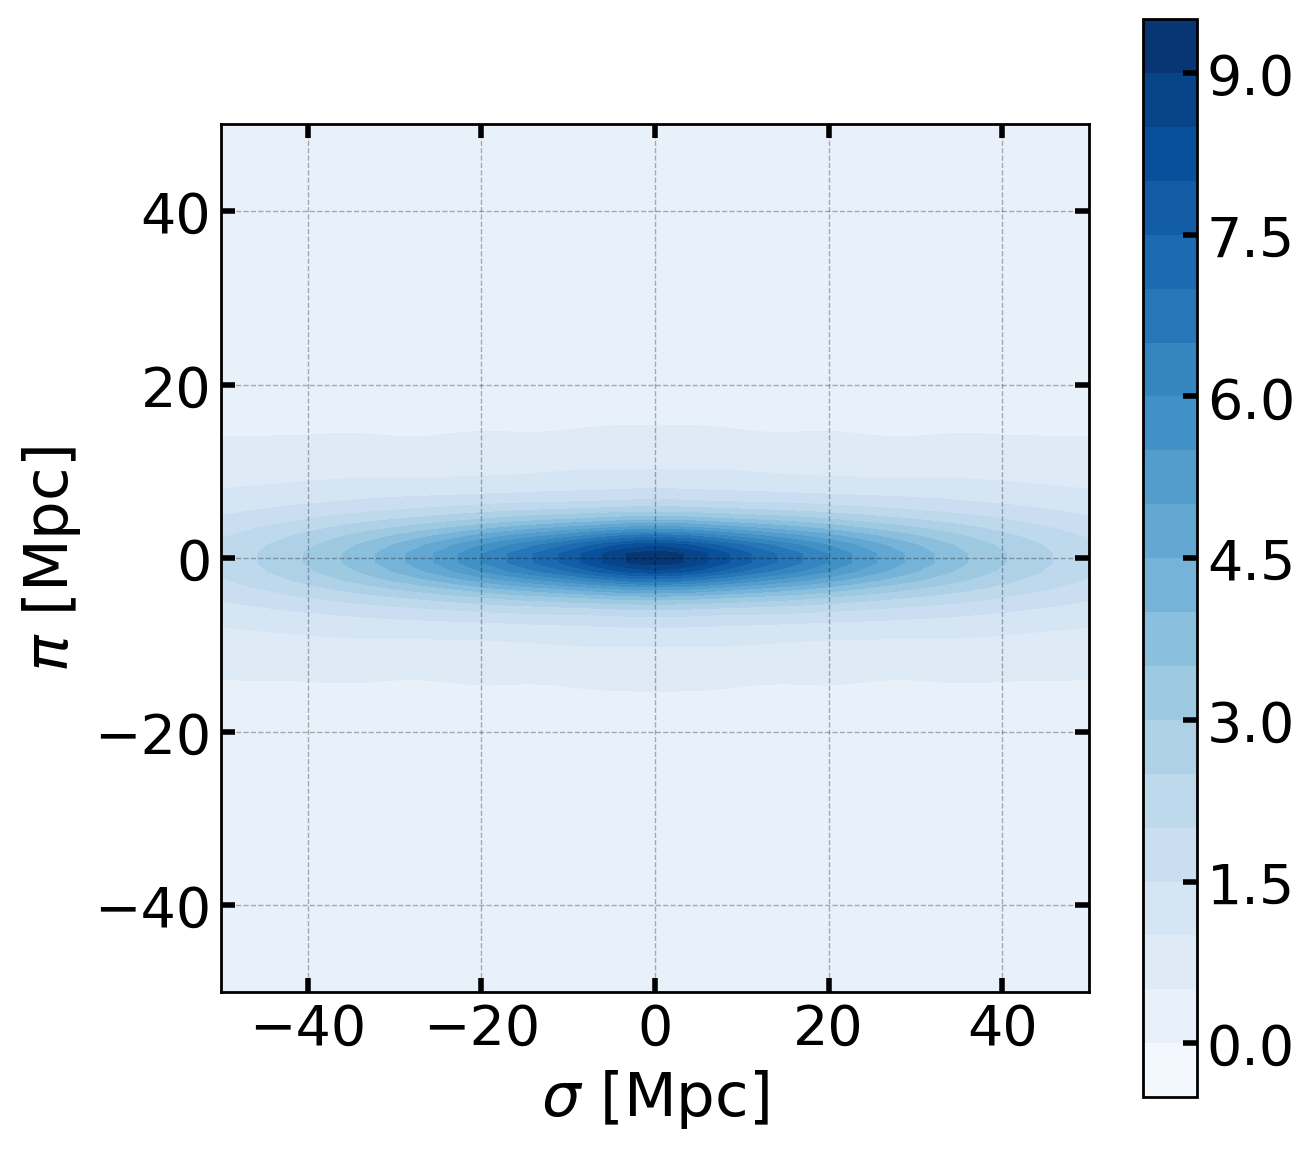

In [172]:
fig, ax = plt.subplots(figsize=(7, 7)) 
ax.set_xlabel(r'$\sigma$ $[\rm{Mpc}]$',fontsize=22)
ax.set_ylabel(r'$\pi$ $[\rm{Mpc}]$',fontsize=22)
#csp=plt.contourf(x, y, b, locator=ticker.LogLocator(), cmap=cm.PuBu_r)
#cbar = fig.colorbar(csp)
plt.contourf(x, y, b, 20, cmap='Blues')
plt.colorbar();
ax.set_aspect('equal')
plt.xlim(-50, 50)
plt.ylim(-50, 50)

## Convert to $(s, \mu)$

By the spherical coordinates defintion we can convert $(r_{\perp}, \pi)$ to $(s, \mu)$. Basically:
$$
s^2 = r_{\perp}^2+\pi^2
$$
With, $\mu= \cos{\theta}$ being equal to:
$$
\mu = \pi/s
$$

In [146]:
def to_smu(rperp, pivec):
    svec = np.sqrt(rperp**2 + pivec**2)
    muvec = pivec/svec
    return svec, muvec

In [147]:
s2d, mu2d = to_smu(e2, e1)

def get_unitary_vectors(self):
    pivec = np.arange(0., 200, 1)
    rpar = (self.attrs['edges'][:-1]+np.diff(self.attrs['edges'])/2.)
    e1, e2 = np.meshgrid(rpar, pivec)
    return e1, e2

def average_over_mu(self,mumean=0.5, deltaMu=0.5):
    xi_2d = self.corr['corr'].T
    e1, e2 = get_unitary_vectors(self)
    s2d, mu2d = to_smu(e1, e2)
    
    #xi_2d = np.where(xi_2d<0, 0., xi_2d)
    npi, ns = xi_2d.shape
    xi_s = np.zeros((ns,))
    
    for i in range(ns):
        muvec = mu2d[:,i]
        integrand = np.where( np.abs(muvec-mumean)>deltaMu, 0, xi_2d[:,i])
        xi_s[i] = 2*np.trapz(integrand, x=muvec)
    return s2d[0], xi_s


In [148]:
pis, xi_pi = average_over_mu(crfs[2],mumean=1.0, deltaMu=0.5)
s, xi_sigma = average_over_mu(crfs[2],mumean=0.5, deltaMu=0.5)

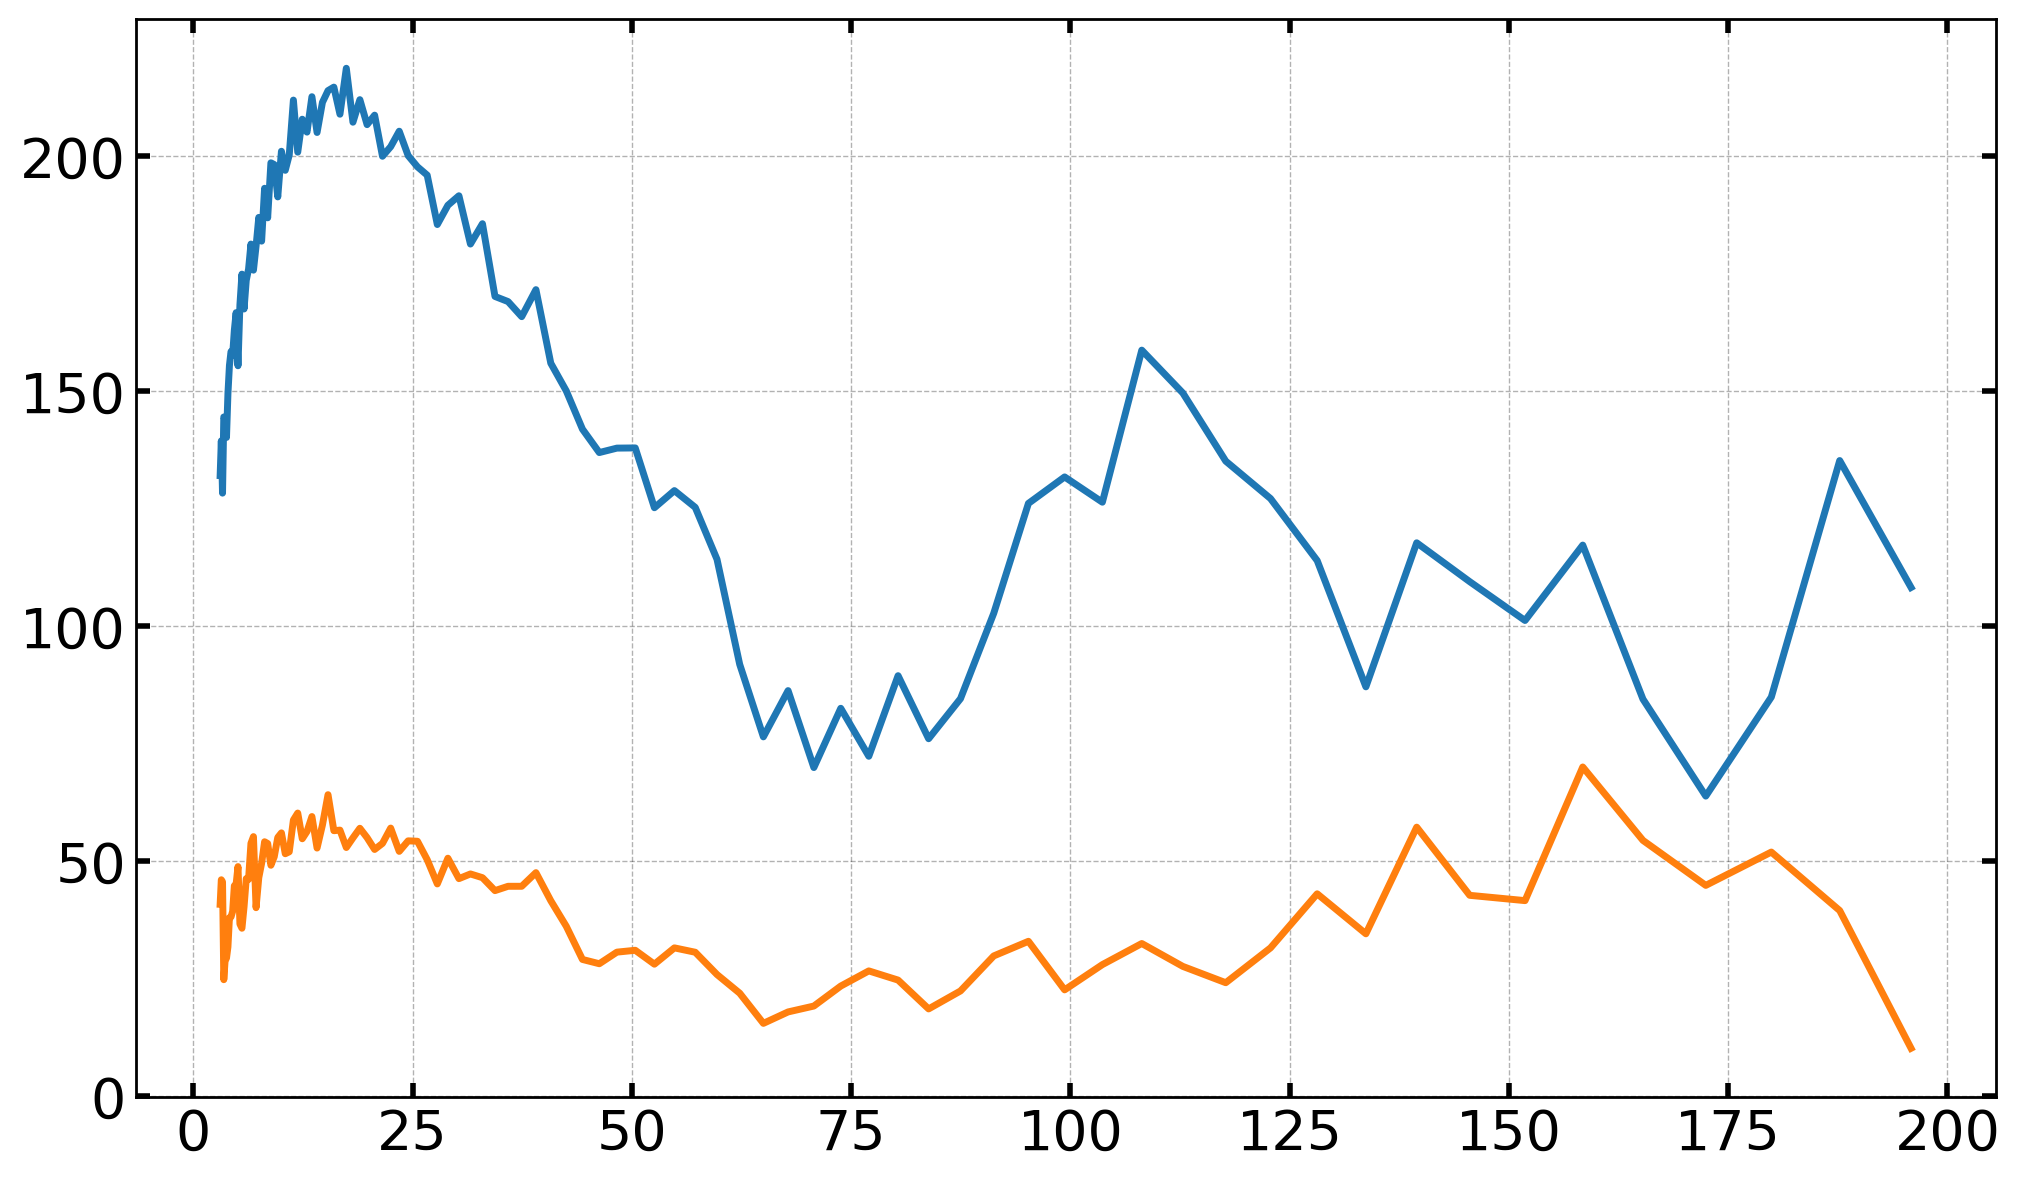

In [149]:
# plt.xscale('log')
# plt.plot(s, s*s*xi_s)
# plt.plot(pis, pis*pis*xi_pi)
# plt.ylim(100,259)
plt.plot(s, s*s*xi_sigma)
plt.plot(pis, s*s*xi_pi)


## Profiles

/tmp/ipykernel_610/89017245.py:26: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(0, 30)


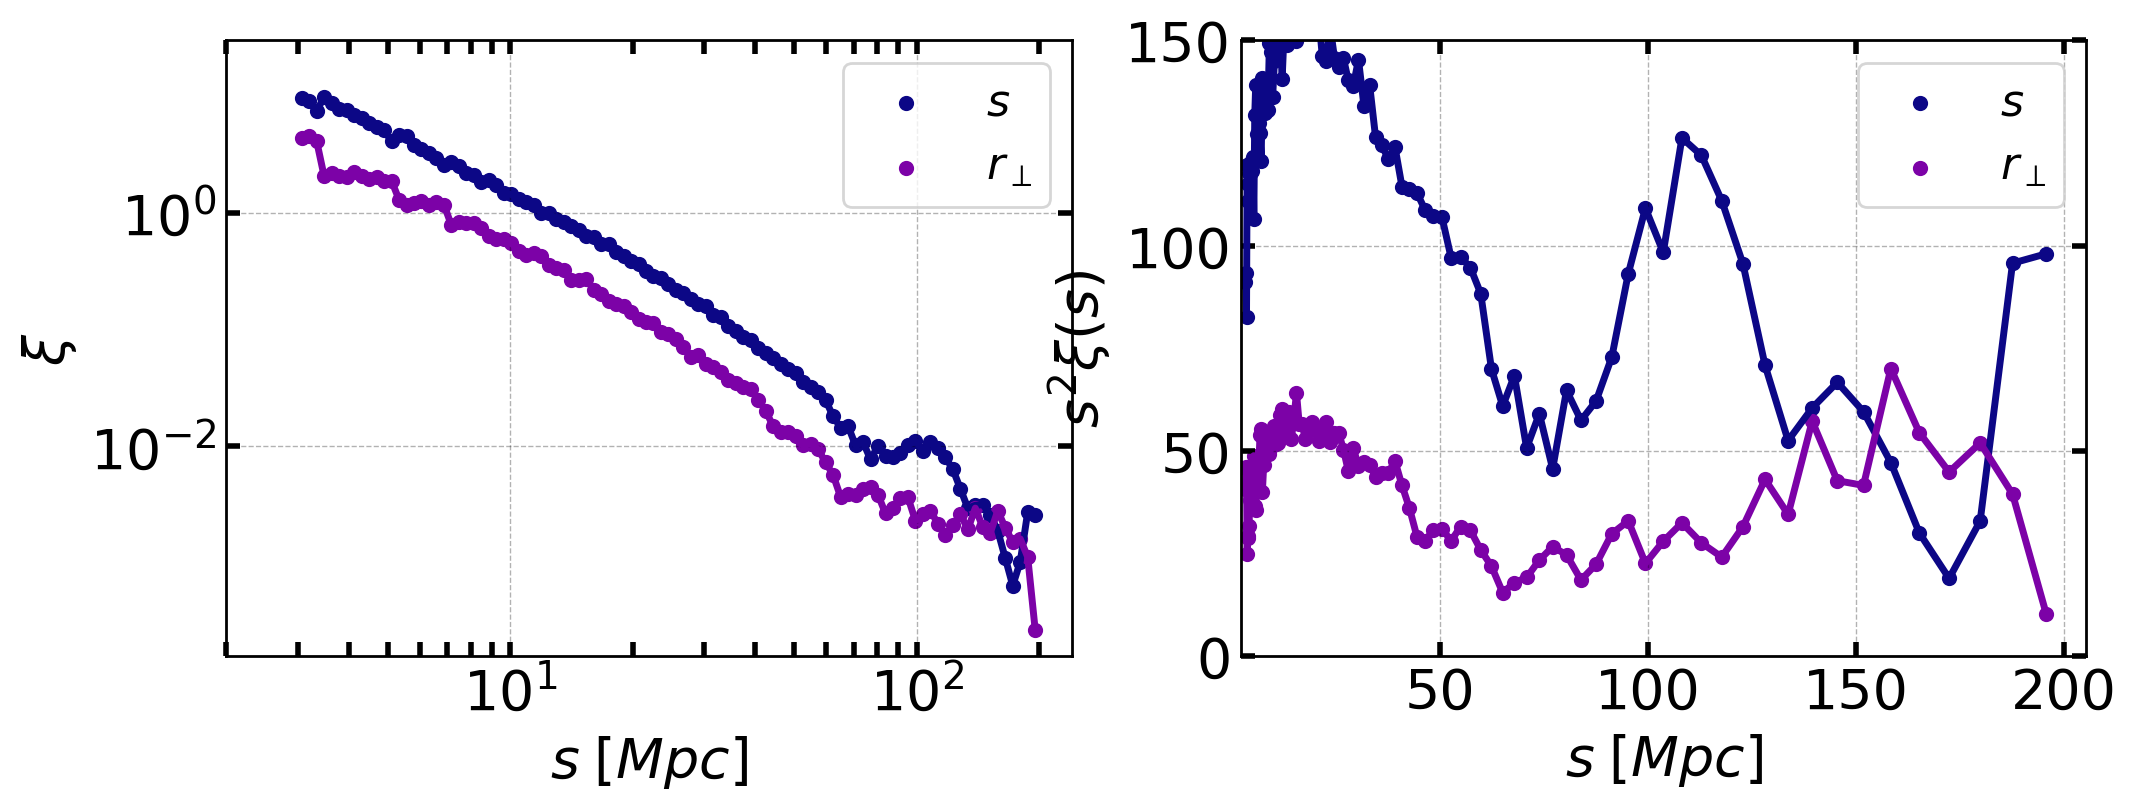

In [141]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4.))
self = crfs[2]
# xi_2d = z.T#self.corr['corr']
xi_2d = self.corr['corr'].T
xi_2d = np.where(xi_2d<0, 0, xi_2d)

pis, xi_pi = average_over_mu(self, mumean=1., deltaMu=0.5)
s, xi_s = average_over_mu(self, mumean=0., deltaMu=0.5)

# xi_perp  = np.median(xi_2d[0:30,:],0)
# xi_pi = np.where((xi_pi<0.3) | (rpara>100), 0., xi_pi)

ax = axs[0]
ax.loglog()
# ax.set_xscale('log')
ax.scatter(s, xi_s, s=20, color=colors[0],label=r'$s$')
ax.plot(s, xi_s, color=colors[0])

ax.scatter(pis, xi_pi, s=20, color=colors[1],label=r'$r_{\perp}$')
ax.plot(pis, xi_pi, color=colors[1])

ax.legend()
ax.set_xlabel(kwargs['r'])
ax.set_ylabel(kwargs['xi'])
ax.set_xlim(2., )
ax.set_ylim(0, 30)

ax = axs[1]
# ax.loglog()
# ax.set_xscale('log')
xi_s2 = xi_s*s*s
ax.scatter(s, xi_s2, s=20, color=colors[0],label=r'$s$')
ax.plot(s, xi_s2, color=colors[0])

xi_pi2 = pis*pis*xi_pi
ax.scatter(pis, xi_pi2, s=20, color=colors[1],label=r'$r_{\perp}$')
ax.plot(pis, xi_pi2, color=colors[1])
ax.set_ylim(0, 150)
ax.set_xlim(2., )
ax.legend()
ax.set_xlabel(kwargs['r'])
ax.set_ylabel(kwargs['sxi'])
fig.savefig('xi_profile_mock_bin_0.png',dpi=150)
# ax.set_ylim(5, 300)

### CAMB


In [22]:
import camb
from camb import model, initialpower
print('Using CAMB %s installed at %s'%(camb.__version__,os.path.dirname(camb.__file__)))

Using CAMB 1.3.6 installed at /global/homes/j/jesteves/.conda/envs/for-nbodykit/lib/python3.10/site-packages/camb


In [23]:
pars = camb.CAMBparams()
pars.set_cosmology(H0=70, ombh2=0.046*0.7**2, omch2=0.286*0.7**2)
pars.InitPower.set_params(ns=0.96)
#Note non-linear corrections couples to smaller scales than you want
pars.set_matter_power(redshifts=list(zmeans), kmax=2.0)

#Linear spectra
pars.NonLinear = model.NonLinear_none
results = camb.get_results(pars)
kh_lin, z_lin, pk_lin = results.get_matter_power_spectrum(minkh=1e-5, maxkh=10000, npoints = 1000)
s8 = np.array(results.get_sigma8())

#Non-Linear spectra (Halofit)
pars.NonLinear = model.NonLinear_both
results.calc_power_spectra(pars)
kh_nonlin, z_nonlin, pk_nonlin = results.get_matter_power_spectrum(minkh=1e-5, maxkh=10000, npoints = 1000)


Note: redshifts have been re-sorted (earliest first)


In [24]:
import hankl
print("Using hankel v{}".format(hankl.__version__))
# s = rpar
def get_corrFunc(s, k, pk):
    si, xi0 = hankl.P2xi(k, pk, l=0)
    xi0 -= np.min(xi0) 
    xi = interp1d(si, xi0)(s)
    return s, xi

Using hankel v1.1.0


In [25]:
xi_nonlin = np.zeros((3, s.size))
for i in range(3):
    s, crf = get_corrFunc(s, kh_nonlin, pk_nonlin[i])
    xi_nonlin[i] = crf

/tmp/ipykernel_610/1317786976.py:4: ComplexWarning: Casting complex values to real discards the imaginary part
  xi_nonlin[i] = crf


In [26]:
def unpack(self):
    s, xi_s = average_over_mu(self)
    return s, xi_s

In [27]:
# plt.loglog()
# plt.plot(s, xi_nonlin[0])
# np.min(xi_nonlin[0])

In [28]:
# import cluster_toolkit as ct


## Plot Results

In [29]:
from bokeh.palettes import Magma, Inferno, Plasma, Viridis, Cividis

colors = Plasma[5]

In [30]:
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d

smin_lim, smax_lim = 3., 50.

bias = []
for zbin in range(3):
    # load data
    s, xi = unpack(crfs[zbin])
    
    mask = (s>=smin_lim)&(s<=smax_lim)

    # load model
    xi_camb = interp1d(s, xi_nonlin[zbin])
    xi_cls = lambda x,b: b**2*xi_camb(x)*x*x

    # fit the data
    popt, pcov = curve_fit(xi_cls, s[mask], s[mask]*s[mask]*xi[mask])
    bias.append(float(popt))

In [42]:
bias

[2.510689171339477, 2.9887463818964273, 3.2382872492790935]

Text(0.5, 1.0, 'Buzzar Mock - Cluster P(k)')

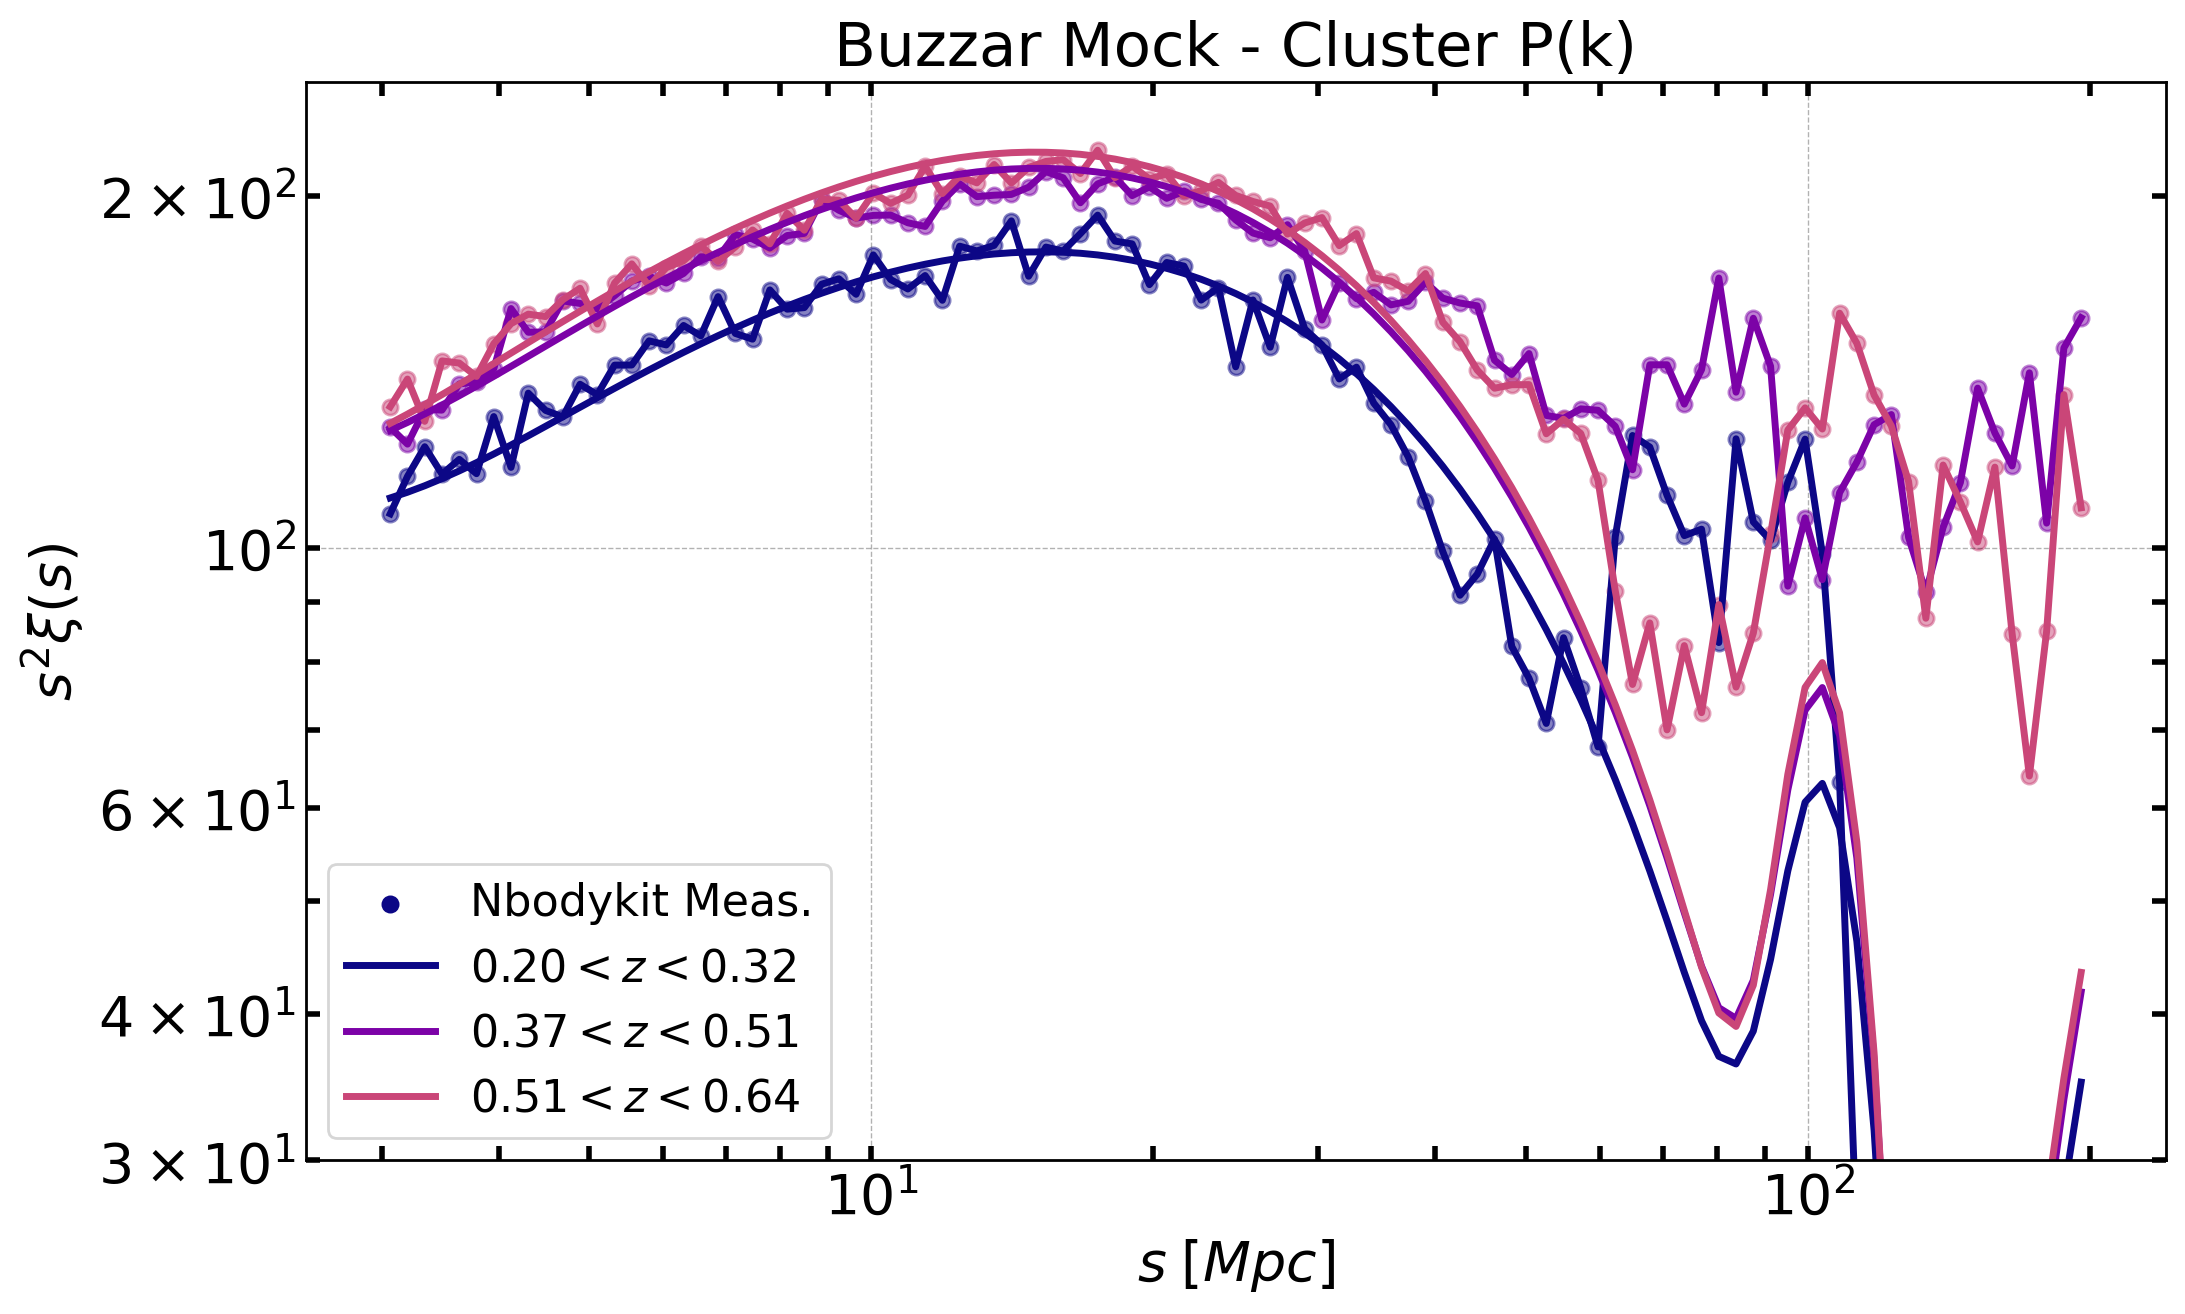

In [31]:
# s = rpar
plt.loglog()
# plt.xscale('log')
for i in range(3):
    s, xi = unpack(crfs[i])
    plt.scatter(s, s*s*xi, color=colors[i], alpha=0.5, s=30)
    plt.plot(s, s*s*xi, '-', color=colors[i])
plt.scatter([0],[0], color=colors[0], s=30, label='Nbodykit Meas.')

# bias = 2.5*((1+zmeans)/(1+0.25))**(1.1)
for i in range(3):
    xi = bias[i]**2*xi_nonlin[i]
    #plt.scatter(s, s*s*xi, color=colors[i], alpha=0.5, s=30)
    plt.plot(s, s*s*xi, '-', color=colors[i], label=zlabel[i])

plt.ylim(30., 250)
plt.legend(loc=0)
plt.xlabel(kwargs['r'])
plt.ylabel(kwargs['sxi'])
plt.title('Buzzar Mock - Cluster P(k)')

In [32]:
# plt.scatter(zmeans, bias)

In [38]:
fnamebase = '2PCF_zbin_%i.npz'
for i in range(3):
    fname = fnamebase%i
    s, xi = unpack(crfs[i])
    np.savez(fname, s=s, xi=xi)

In [41]:
# rm 2PCF_zbin_%i.npz 

## Jackknife

In [639]:
!ls /global/cfs/cdirs/des/jesteves/data/buzzard/v1.9.8/y3_rm/nbody_output/tmp/xi*

/global/cfs/cdirs/des/jesteves/data/buzzard/v1.9.8/y3_rm/nbody_output/tmp/xi_mock_z0_k0.json
/global/cfs/cdirs/des/jesteves/data/buzzard/v1.9.8/y3_rm/nbody_output/tmp/xi_mock_z0_k1.json
/global/cfs/cdirs/des/jesteves/data/buzzard/v1.9.8/y3_rm/nbody_output/tmp/xi_mock_z0_k2.json
/global/cfs/cdirs/des/jesteves/data/buzzard/v1.9.8/y3_rm/nbody_output/tmp/xi_mock_z0_k3.json
/global/cfs/cdirs/des/jesteves/data/buzzard/v1.9.8/y3_rm/nbody_output/tmp/xi_mock_z0_k4.json
/global/cfs/cdirs/des/jesteves/data/buzzard/v1.9.8/y3_rm/nbody_output/tmp/xi_mock_z0_k5.json
/global/cfs/cdirs/des/jesteves/data/buzzard/v1.9.8/y3_rm/nbody_output/tmp/xi_mock_z0_k6.json
/global/cfs/cdirs/des/jesteves/data/buzzard/v1.9.8/y3_rm/nbody_output/tmp/xi_mock_z0_k7.json
/global/cfs/cdirs/des/jesteves/data/buzzard/v1.9.8/y3_rm/nbody_output/tmp/xi_mock_z0_k8.json
/global/cfs/cdirs/des/jesteves/data/buzzard/v1.9.8/y3_rm/nbody_output/tmp/xi_mock_z0_k9.json
/global/cfs/cdirs/des/jesteves/data/buzzard/v1.9.8/y3_rm/nbody_output/

In [10]:
fname = '/global/cfs/cdirs/des/jesteves/data/buzzard/v1.9.8/y3_rm/nbody_output/tmp/xi_mock_z1_k%i.json'

kcrfs = []
for i in range(10):
    kcrfs.append(SurveyData2PCF.load(fname%i))

NameError: name 'unpack' is not defined

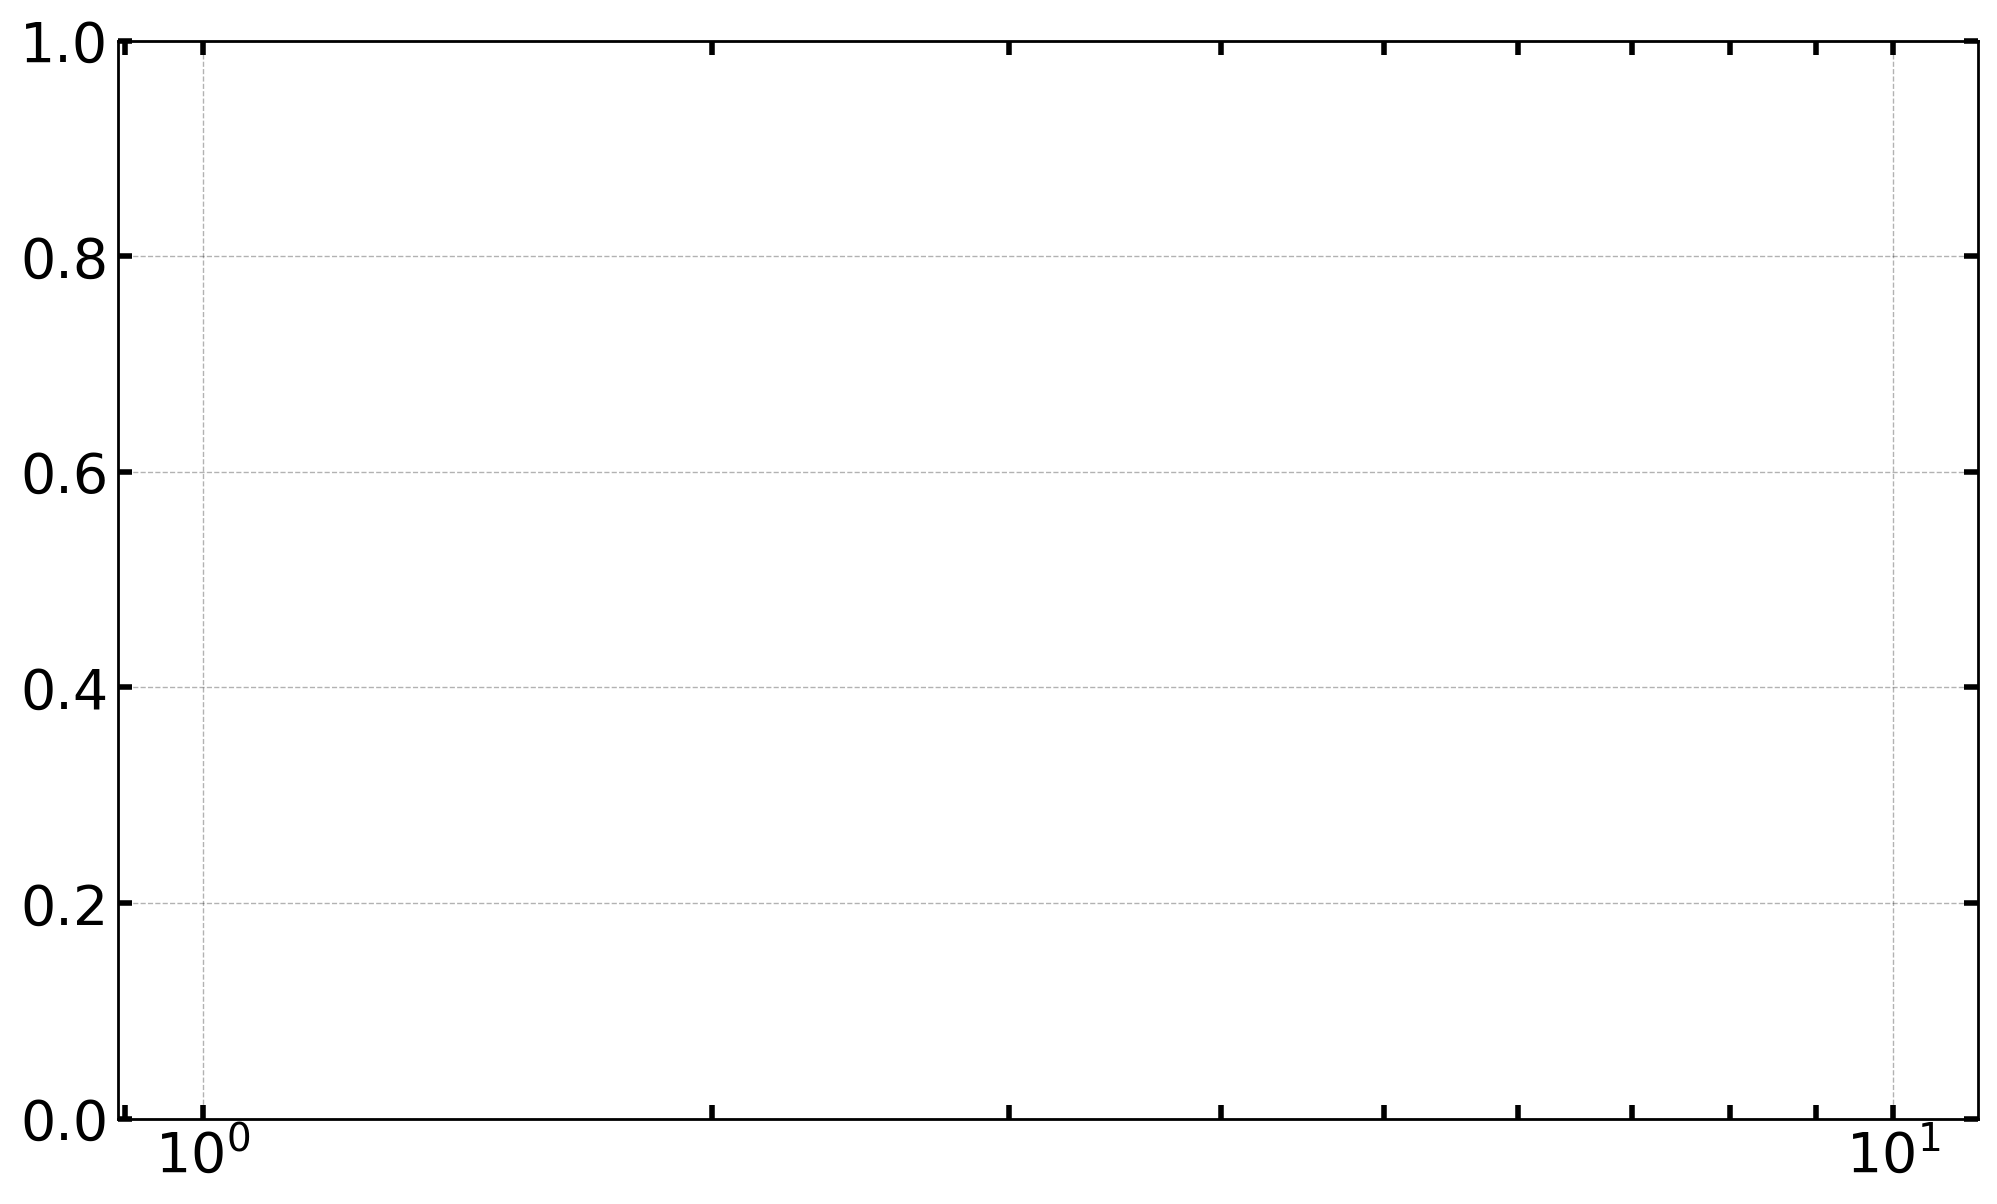

In [11]:
# plt.loglog()
plt.xscale('log')
i=1
s, xi = unpack(crfs[i])
plt.scatter(s, s*s*xi, color='k', alpha=0.5, s=30)
plt.plot(s, s*s*xi, '-', color='k', label='all')

for i in range(10):
    s, xi = unpack(kcrfs[i])
    plt.scatter(s, s*s*xi, alpha=0.5, s=30, label='Group = %i'%i)
    #plt.plot(s, s*s*xi, '-')

# plt.scatter([0],[0], color=colors[0], s=30, label='Nbodykit Meas.')
# bias = 2.15*((1+zmeans)/(1+0.25))**(1.2)
# for i in range(3):
#     xi = bias[i]**2*xi_nonlin[i]
#     #plt.scatter(s, s*s*xi, color=colors[i], alpha=0.5, s=30)
#     plt.plot(s, s*s*xi, '-', color=colors[i], label=zlabel[i])
plt.xlim(2.5, 50)
plt.ylim(0., 300)
plt.legend(loc=0)
plt.xlabel(kwargs['r'])
plt.ylabel(kwargs['xi'])
plt.title('Jackknife')

## Power Spectrum

In [175]:
!ls -lth /global/cfs/cdirs/des/jesteves/data/buzzard/v1.9.8/y3_rm/nbody_output/*.json

-rw-rw---- 1 jesteves des  93K Nov 28 14:01 /global/cfs/cdirs/des/jesteves/data/buzzard/v1.9.8/y3_rm/nbody_output/power_z0_all.json
-rw-rw---- 1 jesteves des  91K Nov 28 14:01 /global/cfs/cdirs/des/jesteves/data/buzzard/v1.9.8/y3_rm/nbody_output/power_z2_all.json
-rw-rw---- 1 jesteves des  92K Nov 28 14:01 /global/cfs/cdirs/des/jesteves/data/buzzard/v1.9.8/y3_rm/nbody_output/power_z1_all.json
-rw-rw---- 1 jesteves des 3.8M Nov 28 11:31 /global/cfs/cdirs/des/jesteves/data/buzzard/v1.9.8/y3_rm/nbody_output/xi_z2_all.json
-rw-rw---- 1 jesteves des 3.7M Nov 28 11:31 /global/cfs/cdirs/des/jesteves/data/buzzard/v1.9.8/y3_rm/nbody_output/xi_z1_all.json
-rw-rw---- 1 jesteves des 3.7M Nov 28 11:30 /global/cfs/cdirs/des/jesteves/data/buzzard/v1.9.8/y3_rm/nbody_output/xi_z0_all.json


In [176]:
fname = '/global/cfs/cdirs/des/jesteves/data/buzzard/v1.9.8/y3_rm/nbody_output/power_z%i_all.json'
powers = []
for i in range(3):
    powers.append(ConvolvedFFTPower.load(fname%i))


In [177]:
from scipy.ndimage import uniform_filter1d

kvec = np.logspace(-3, np.log10(5.), 50)

def roll_average(self, i=0, k_break=0.22, Nl=20, Nu=10, kmin=0.01, kmax=2.0):
    power = self.poles.sel(k=slice(kmin, kmax),method='nearest')
    P = power['power_%i'%i].real 
    if i==0: P -= power.attrs['shotnoise']
    isnan = np.isnan(np.log(P))
    k, pk = power['k'][~isnan], P[~isnan]
    log_k, log_pk = np.log(k), np.log(pk)

    # rolling average
    y = uniform_filter1d(pk, size=int(k.size/Nl)+1)
    y2 = uniform_filter1d(pk, size=int(k.size/Nu)+1)
    ix = np.where(k>0.22)[0]
    y[ix] = y2[ix]
    return k, pk, y


In [178]:
# def do_sum(self, k_break=0.22, kmin=0.01, kmax=2.0):
self = powers[0]
# use the same number of mu wedges and number of multipoles
Nmu = Nell = 5
mu_edges = numpy.linspace(0, 1, Nmu+1)

# get a BinnedStatistic holding the P(k,mu) wedges
Pkmu = self.to_pkmu(mu_edges, 4)

power_mu = Pkmu['power'].real - Pkmu.attrs['shotnoise']

power_mu

array([[ 1.0211249e+06,  9.1474969e+05,  7.6548494e+05,  7.0030150e+05,
         9.0965594e+05],
       [ 1.1071018e+06,  1.0577050e+06,  9.6056894e+05,  8.1900931e+05,
         6.3799938e+05],
       [ 8.6662131e+05,  8.0470844e+05,  6.9140300e+05,  5.4774588e+05,
         4.0529794e+05],
       ...,
       [-7.4636719e+01, -7.4882812e+01, -9.2757812e+01, -1.6302734e+02,
        -3.3784375e+02],
       [-2.3560547e+02, -1.9630469e+02, -1.4473438e+02, -1.3496875e+02,
        -2.4810156e+02],
       [-2.1067969e+02, -2.5276562e+02, -3.1364844e+02, -3.4674609e+02,
        -2.8218750e+02]], dtype=float32)

In [179]:
# plt.loglog()
# plt.plot(Pkmu['k'], Pkmu['power'].real - Pkmu.attrs['shotnoise'])

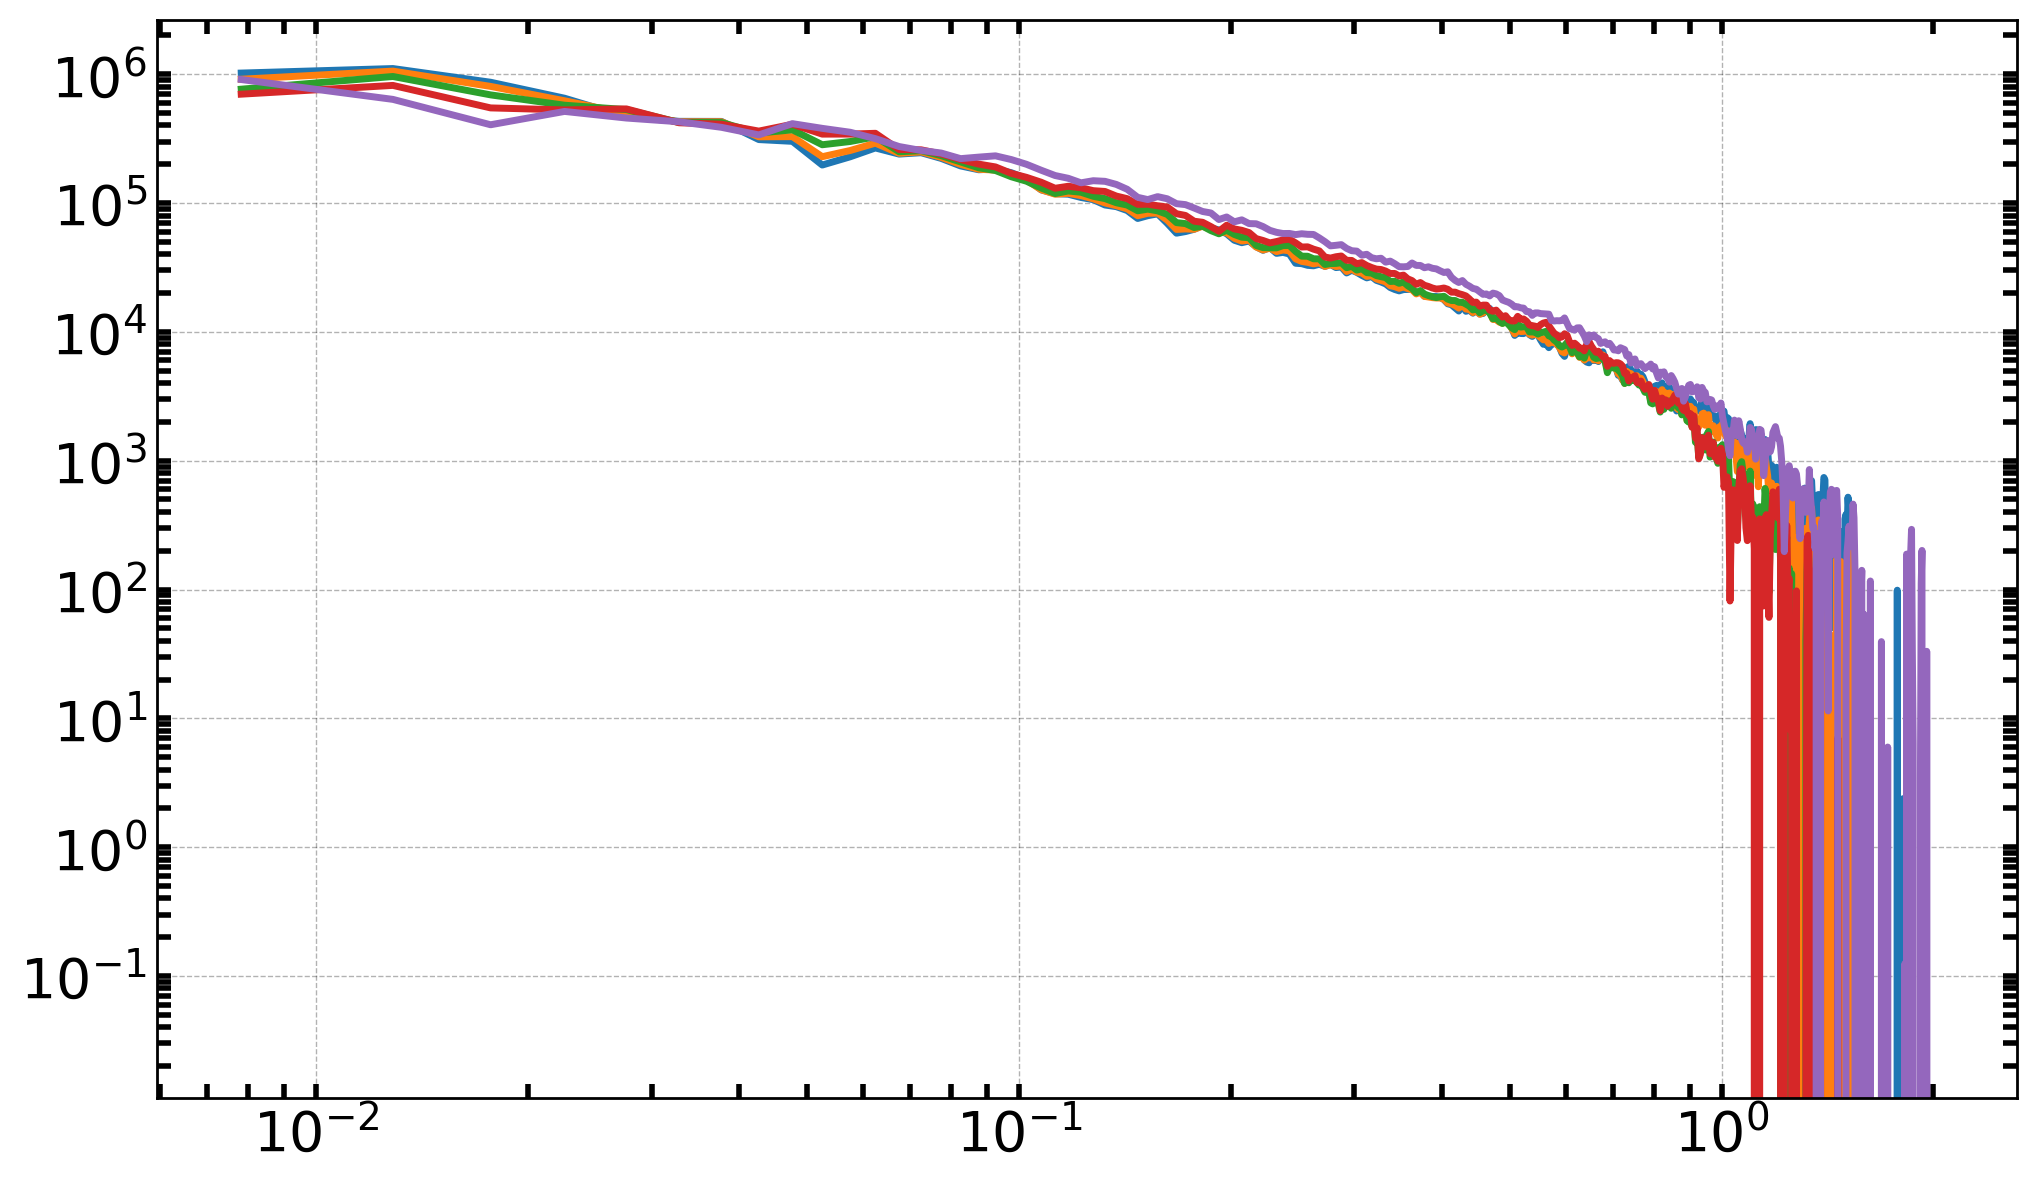

In [180]:
plt.loglog()
plt.plot(Pkmu['k'], Pkmu['power'].real - Pkmu.attrs['shotnoise'])

In [18]:
# plt.imshow()

In [19]:
# mu_means = mu_edges[:-1]+np.diff(mu_edges)

# z = np.log10(Pkmu['k']*Pkmu['power'].real)
# x = Pkmu['k']*(mu_means)
# y = Pkmu['k']*(1-mu_means)
# c = plt.pcolormesh(x, y, z, cmap ='Greens')
# # plt.colorbar(c)

In [20]:
# Pkmu['k']

/tmp/ipykernel_610/1689884862.py:9: RuntimeWarning: invalid value encountered in log
  isnan = np.isnan(np.log(P))


Text(0.5, 1.0, 'Buzzard Mock - Cluster P(k)')

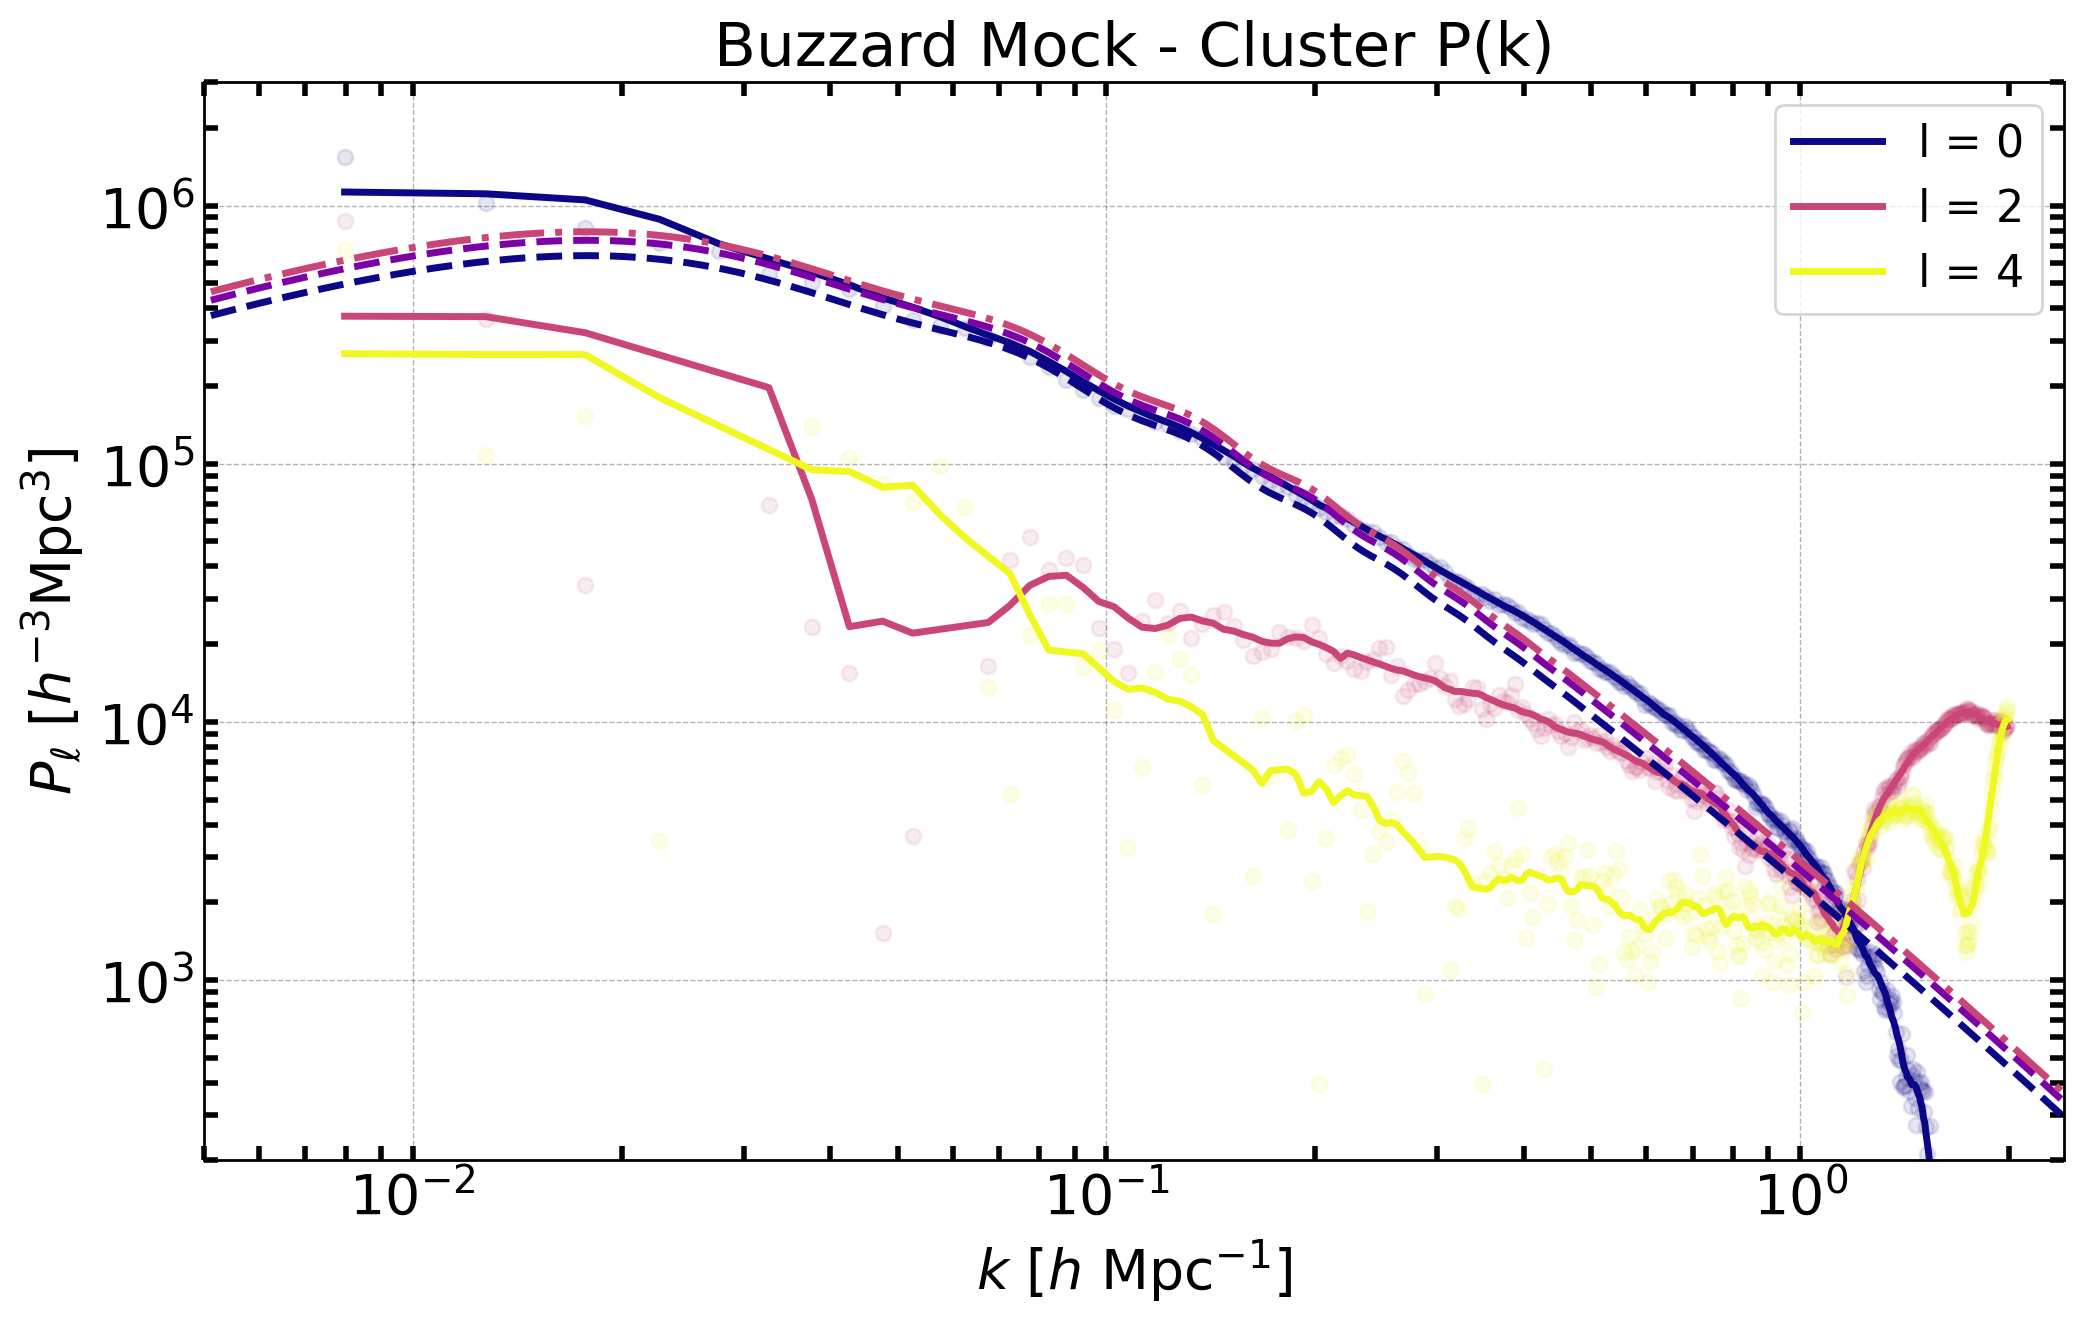

In [181]:
plt.loglog()
# plt.xscale('log')
avg_pks = []
for i in [2]:
    for j in [0, 2, 4]:
        k, pk, pk_avg = roll_average(powers[i], i=j, k_break=0.01, Nl=60, Nu=20)
        plt.scatter(k, pk, color=colors[j], alpha=0.1, s=30)
        plt.plot(k, pk_avg, '-', color=colors[j], label='l = %i'%j)
        avg_pks.append([k, pk])

b=6.7
bias = 6.*((1+zmeans)/(1+0.25))**(1.2)
for i, (redshift, line) in enumerate(zip(list(zmeans),['--','--','-.'])):
    #plt.loglog(kh_lin, b**2*pk_lin[i,:], color=colors[i], ls = line)
    plt.loglog(kh_lin, bias[i]**2*pk_lin[i,:], color=colors[i], ls = line)

plt.legend(loc=0)
plt.xlabel(r"$k$ [$h \ \mathrm{Mpc}^{-1}$]")
plt.ylabel(r"$P_\ell$ [$h^{-3} \mathrm{Mpc}^3$]")
plt.xlim(0.01/2., 2.4)
plt.ylim(2e2, 3e6)
plt.title('Buzzard Mock - Cluster P(k)')